In [1]:
from fmd_evolution import *
import esm # to use the PLM ESM-2
import os # to process evaluation data from MSA file

In [2]:
# Source: https://github.com/facebookresearch/esm/tree/main?tab=readme-ov-file#esmfold
model, alphabet = esm.pretrained.load_model_and_alphabet("esm2_t33_650M_UR50D") 
batch_converter = alphabet.get_batch_converter()

In [3]:
modelSingleton = ModelSingleton(model=model,alphabet=alphabet,batch_converter=batch_converter)

In [4]:
reference_seq = 'TTSAGESADPVTATVENYGGETQVQRRQHTDIAFILDRFVKVKPKEQVNVLDLMQIPAHTLVGALLRTATYYFSDLELAVKHEGDLTWVPNGAPETALDNTTNPTAYHKEPLTRLALPYTAPHRVLATVYNGSSKYGDTSTNNVRGDLQVLAQKAERTLPTSFNFGAIKATRVTELLYRMKRAETYCPRPLLAIQPSDARHKQRIVAPAKQ'

In [5]:
# mutation strategy parameters
constrained_start = 138 # start of high variability region
constrained_end = 143 # end of high variability region
mh_iterations = 10 # for metropolis-hastings algorithm
top_k_percent = 0.03 # % of pool of 114 possible mutations

# evaluation strategy parameters
max_generations = 7

In [6]:
# reference seq parameters
segment = list(reference_seq)[constrained_start-1:constrained_end] # constrained segment to mutate
ref_seq_id = ''.join(segment)
ref_seq_id = "base"

In [7]:
for pos in range(constrained_start,constrained_end+1):
    print(f"Position {pos} : Amino Acid {segment[pos-constrained_start]}")

Position 138 : Amino Acid D
Position 139 : Amino Acid T
Position 140 : Amino Acid S
Position 141 : Amino Acid T
Position 142 : Amino Acid N
Position 143 : Amino Acid N


## Evolution using Metropolis Hastings Across 6 Highly Mutable Positions

In [8]:
plm = ProteinLanguageModel()
fmd_sequence = plm.create_protein_sequence(id=ref_seq_id,sequence=reference_seq) # protein sequence object generator

In [9]:
mutation_strat = MetropolisHastings(iterations=mh_iterations, top_k_percent=top_k_percent, start_pos=constrained_start,end_pos=constrained_end) # to generate pool of mutations
eval_strat = EvaluationStrategy(root_sequence = fmd_sequence) # to score and to filter pool of mutations
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=max_generations)

In [10]:
evolution.evolve_sequence() 

Number of possible_mutations = 114
K mutations (pool size) = 3
Pool of potential mutations: [('S', 140, 'K'), ('N', 142, 'T'), ('S', 140, 'Q')]
Parent: mutation:base, probability:0.80945, distance 0
Accepted: mutation:S140K, probability:0.81218, distance 0.00056
Dominated: mutation:N142T, probability:0.81179, distance 0.00054
Accepted: mutation:S140Q, probability:0.81264, distance 0.00046
Viable mutations: ['S140K', 'S140Q']
Number of possible_mutations = 114
K mutations (pool size) = 3
Pool of potential mutations: [('D', 138, 'T'), ('K', 140, 'V'), ('N', 142, 'T')]
Parent: mutation:S140K, probability:0.81218, distance 0.00056
Accepted: mutation:D138T, probability:0.81041, distance 0.00064
Accepted: mutation:K140V, probability:0.81034, distance 0.00115
Accepted: mutation:N142T, probability:0.81404, distance 0.00062
Viable mutations: ['D138T', 'K140V', 'N142T']
Number of possible_mutations = 114
K mutations (pool size) = 3
Pool of potential mutations: [('K', 140, 'E'), ('T', 141, 'A'), 

In [11]:
# evolution.evolve_sequence() # positions are 0-indexed, adjusted later for graph, fitness landscape, mutation score z axis, y axis pos 1 (all possible aas), y pos 2 (same), order the aminoa cids correctly! using embeddings for what's similar/close

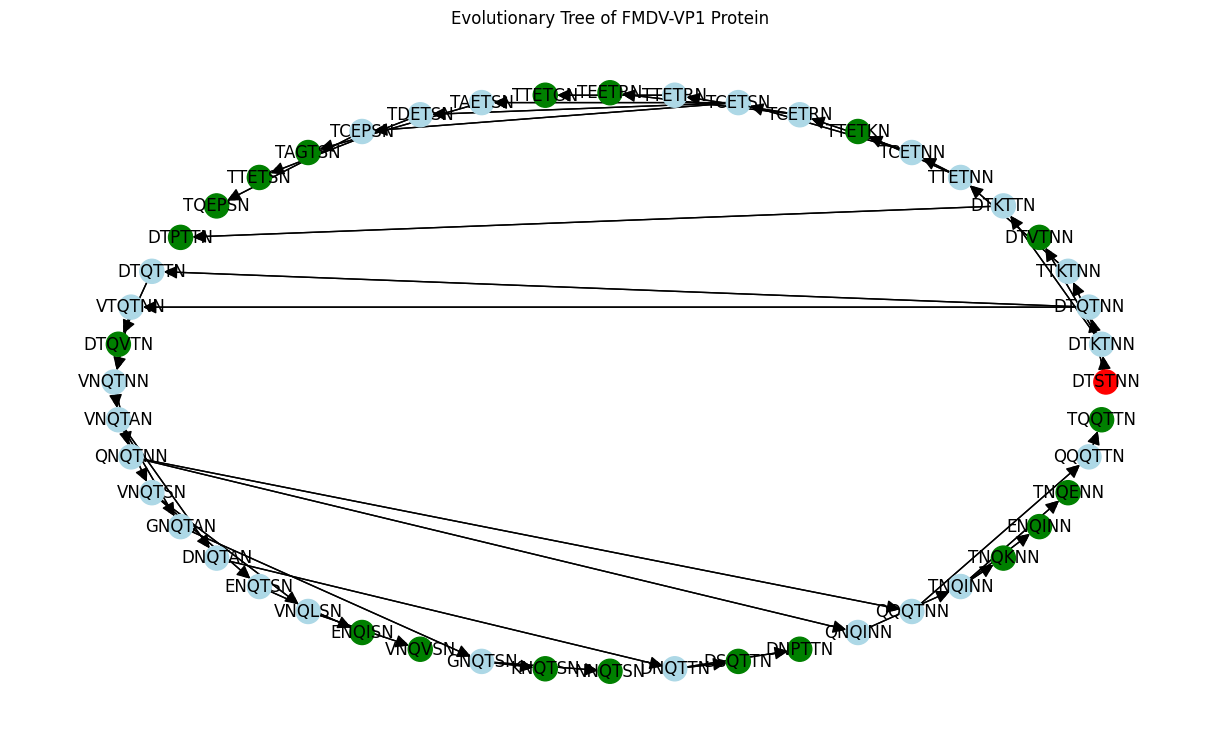

In [12]:
evolution.visualise_graph() 

In [13]:
paths = evolution.get_paths() # paths to leaf nodes only
num_of_paths = len(paths)
print(f"Number of paths generated: {num_of_paths}") # sorted by mean mutation score for path

Number of paths generated: 19


In [14]:
alignment_file_path = os.path.join("fmd_evolution/evaluation", "FMDV_VP1_HVR_1571seq_aln.fas") #  can I push this to my repo? or not supposed to be public?

evaluator = Evaluation(
    tree = evolution.G,
    alignment_file_path = alignment_file_path,
    start_pos = constrained_start,
    ref_seq_id = ref_seq_id
)

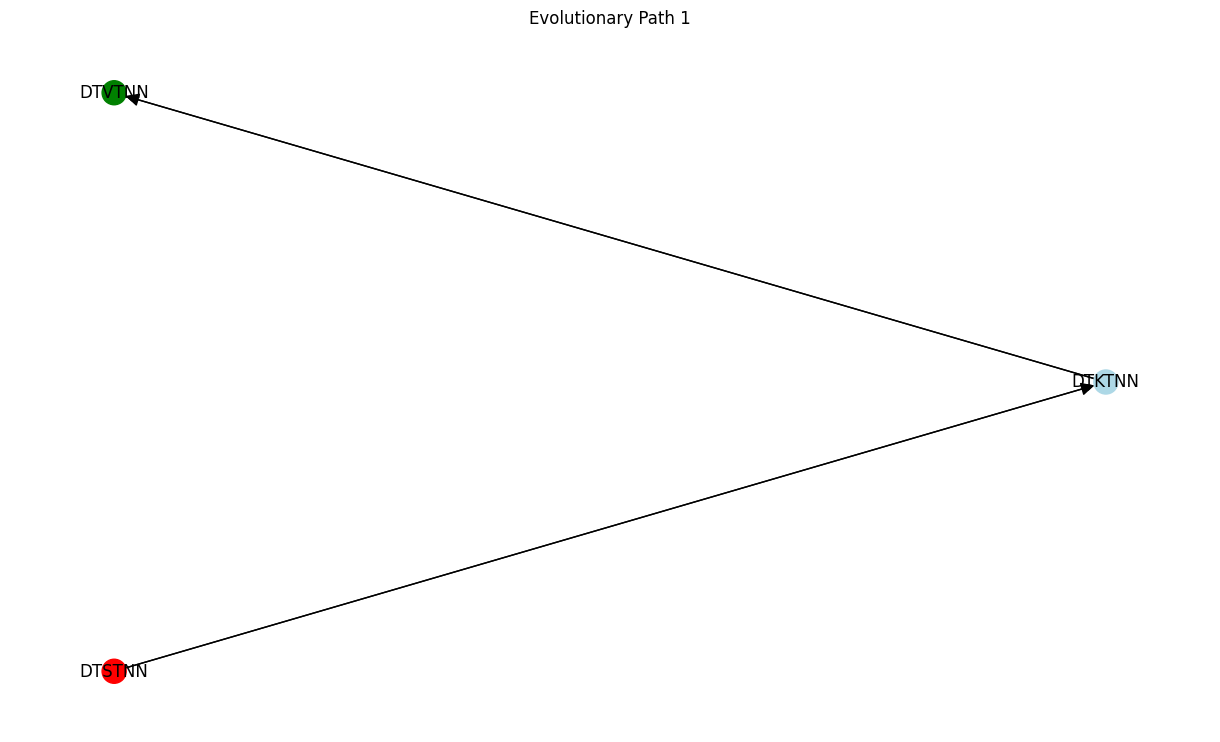

1 as mutations: [None, 'S140K', 'K140V']


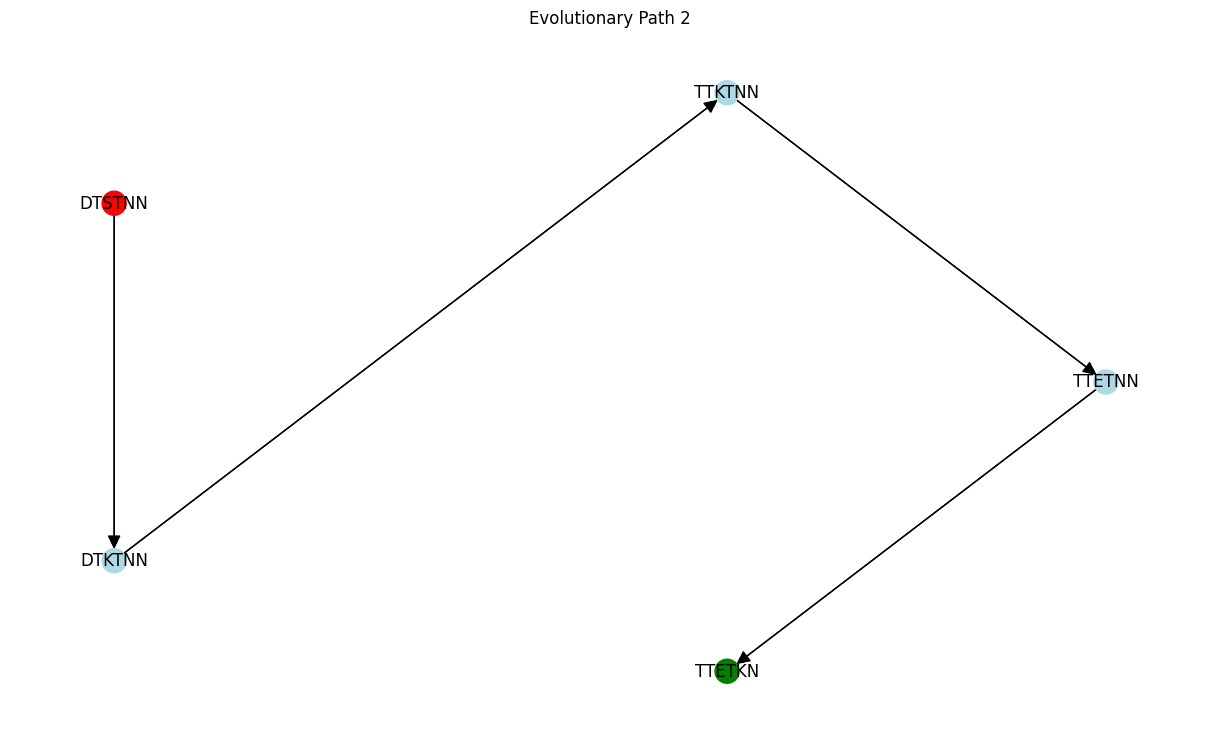

2 as mutations: [None, 'S140K', 'D138T', 'K140E', 'N142K']


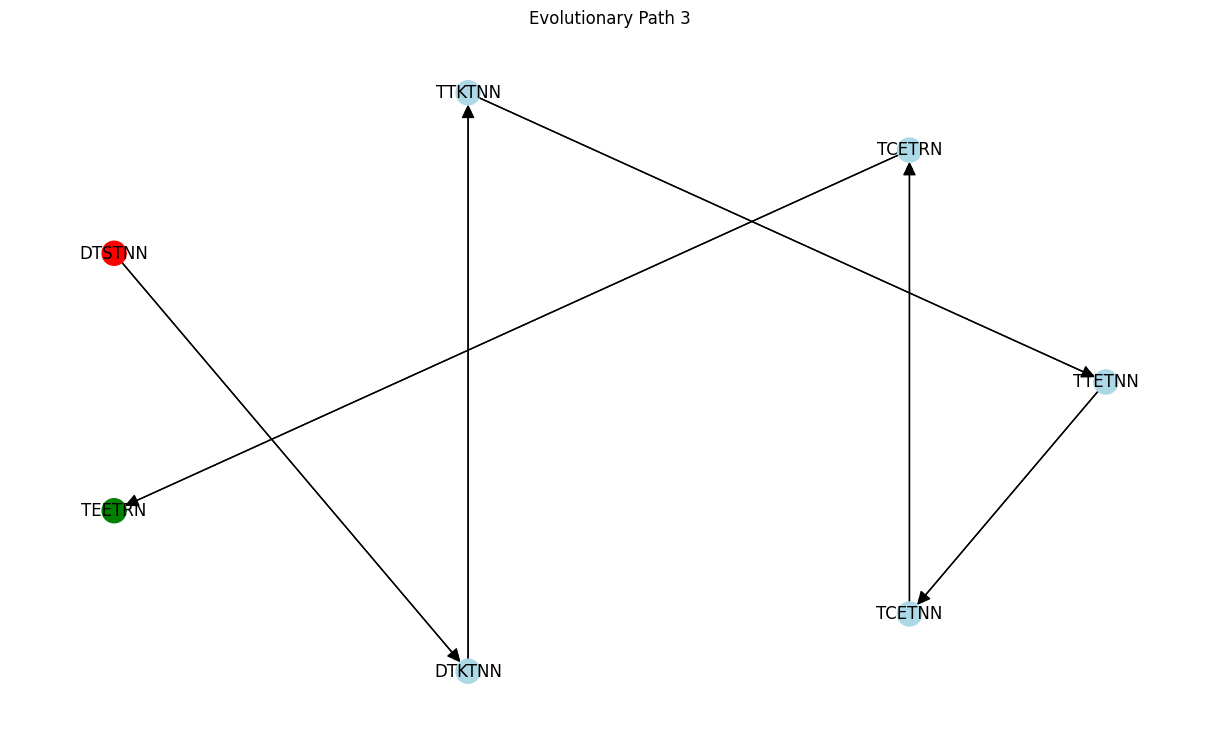

3 as mutations: [None, 'S140K', 'D138T', 'K140E', 'T139C', 'N142R', 'C139E']


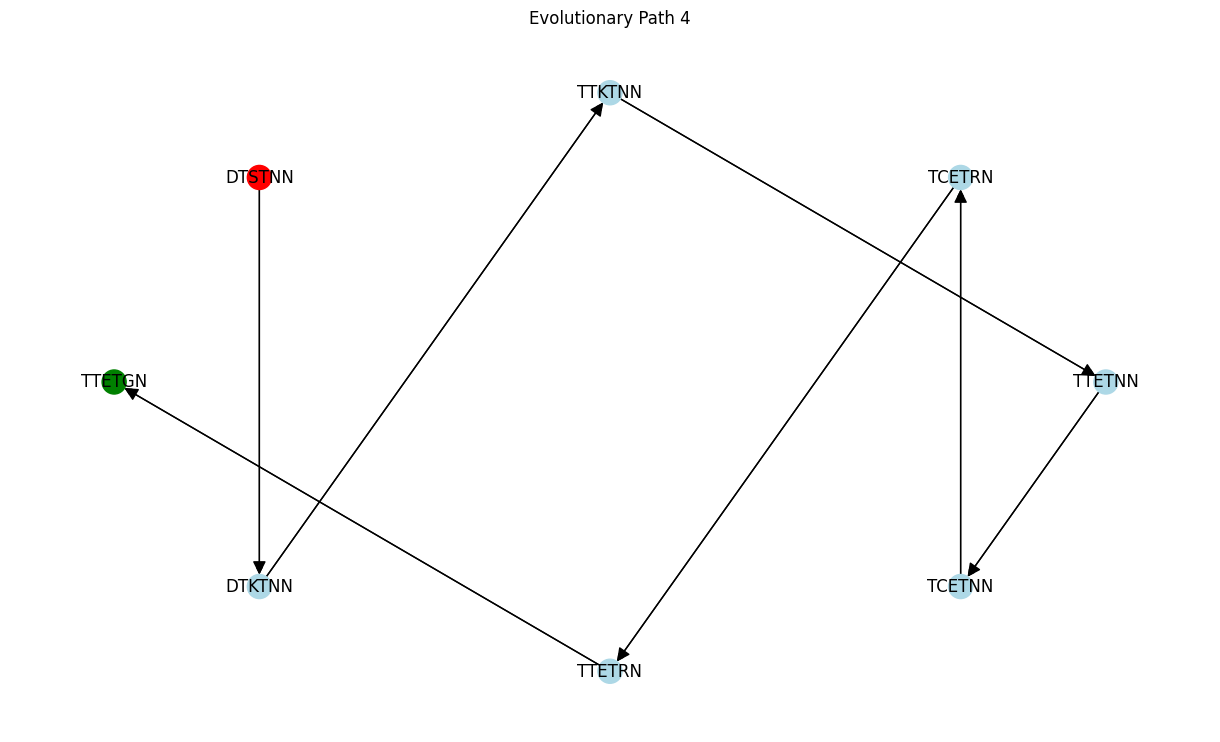

4 as mutations: [None, 'S140K', 'D138T', 'K140E', 'T139C', 'N142R', 'C139T', 'R142G']


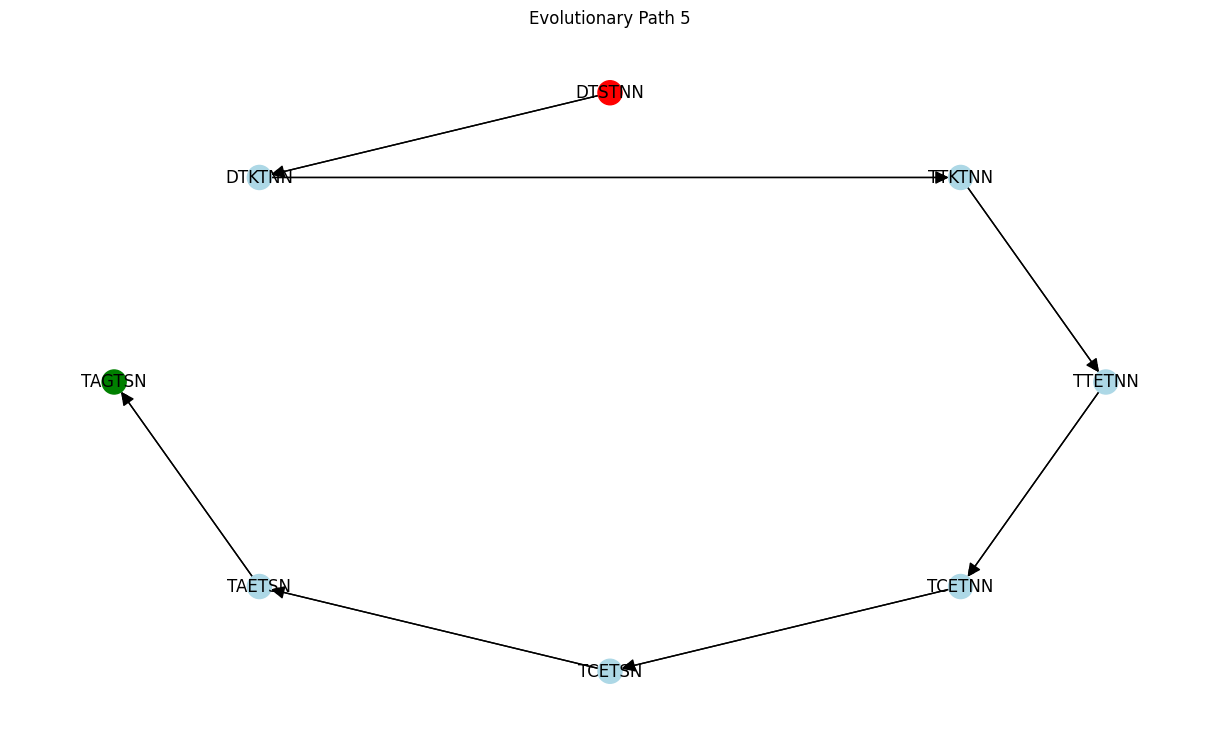

5 as mutations: [None, 'S140K', 'D138T', 'K140E', 'T139C', 'N142S', 'C139A', 'E140G']


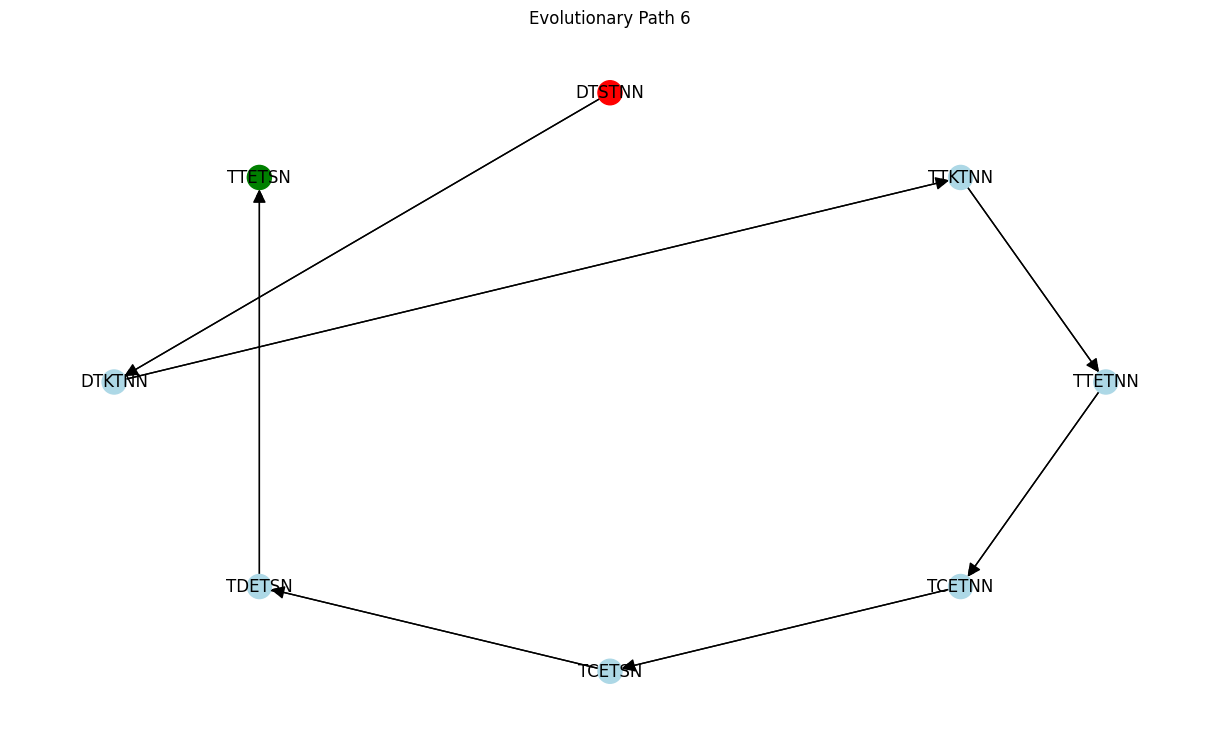

6 as mutations: [None, 'S140K', 'D138T', 'K140E', 'T139C', 'N142S', 'C139D', 'D139T']


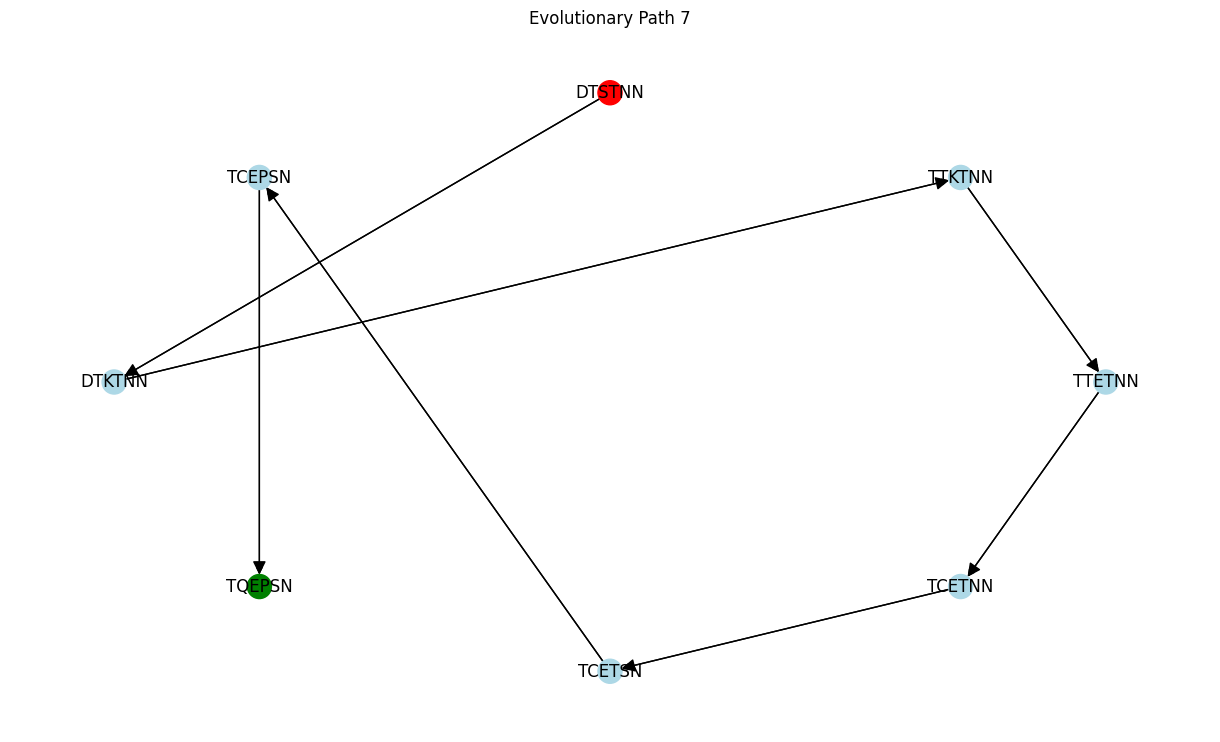

7 as mutations: [None, 'S140K', 'D138T', 'K140E', 'T139C', 'N142S', 'T141P', 'C139Q']


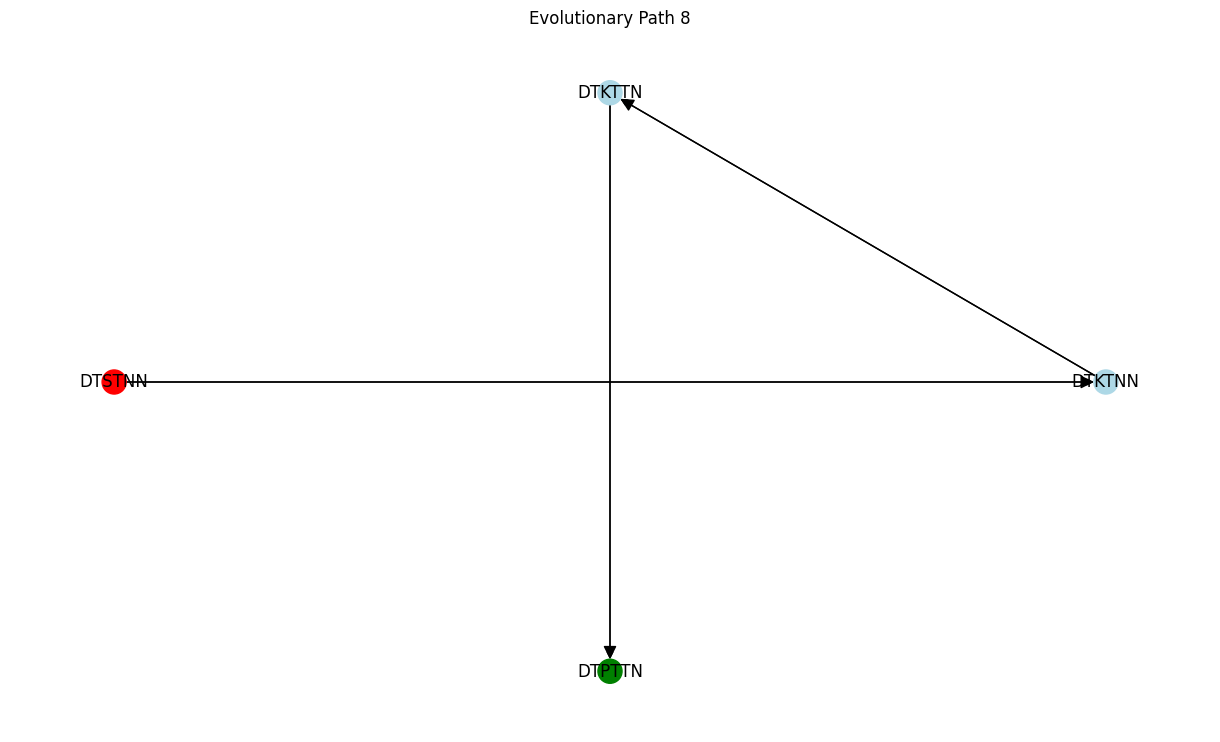

8 as mutations: [None, 'S140K', 'N142T', 'K140P']


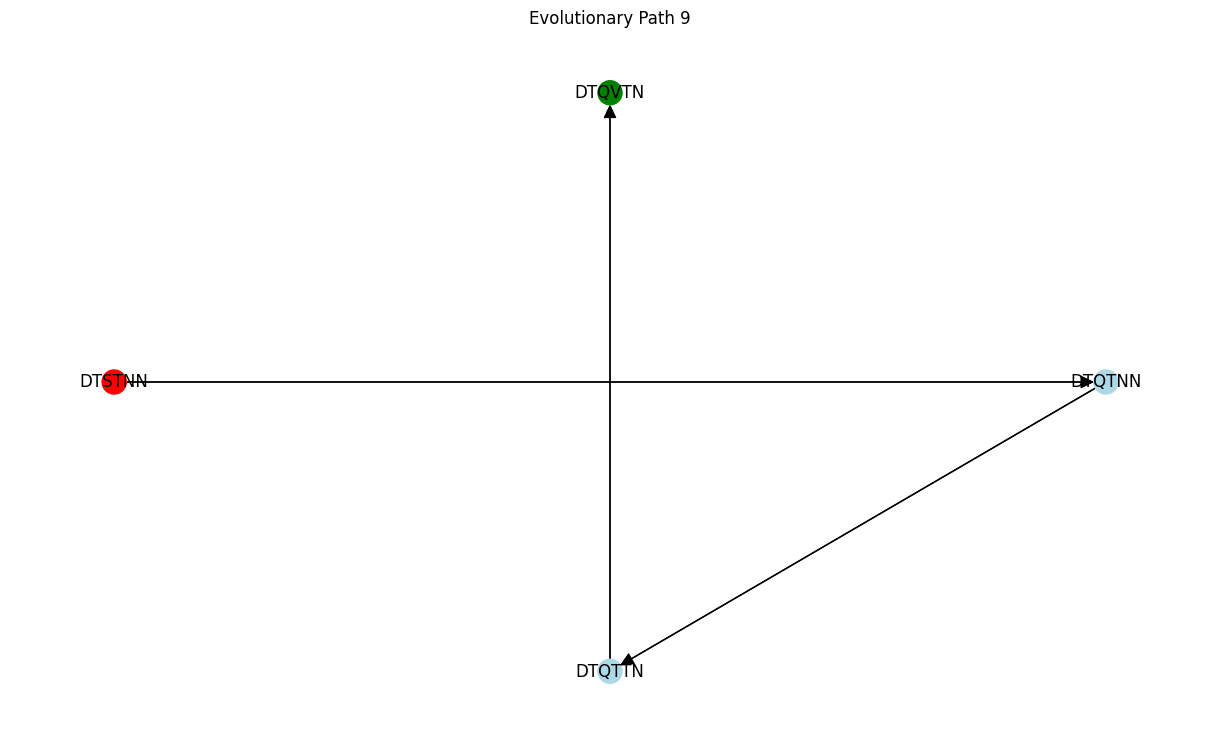

9 as mutations: [None, 'S140Q', 'N142T', 'T141V']


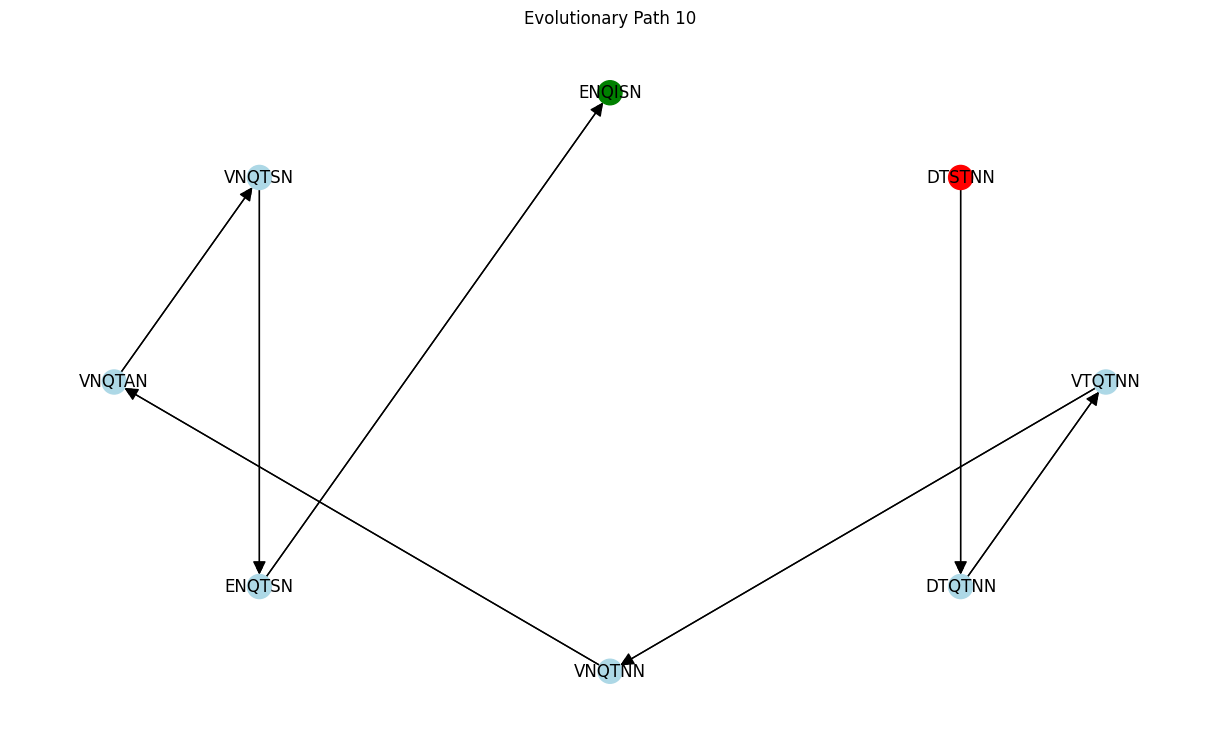

10 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'N142A', 'A142S', 'V138E', 'T141I']


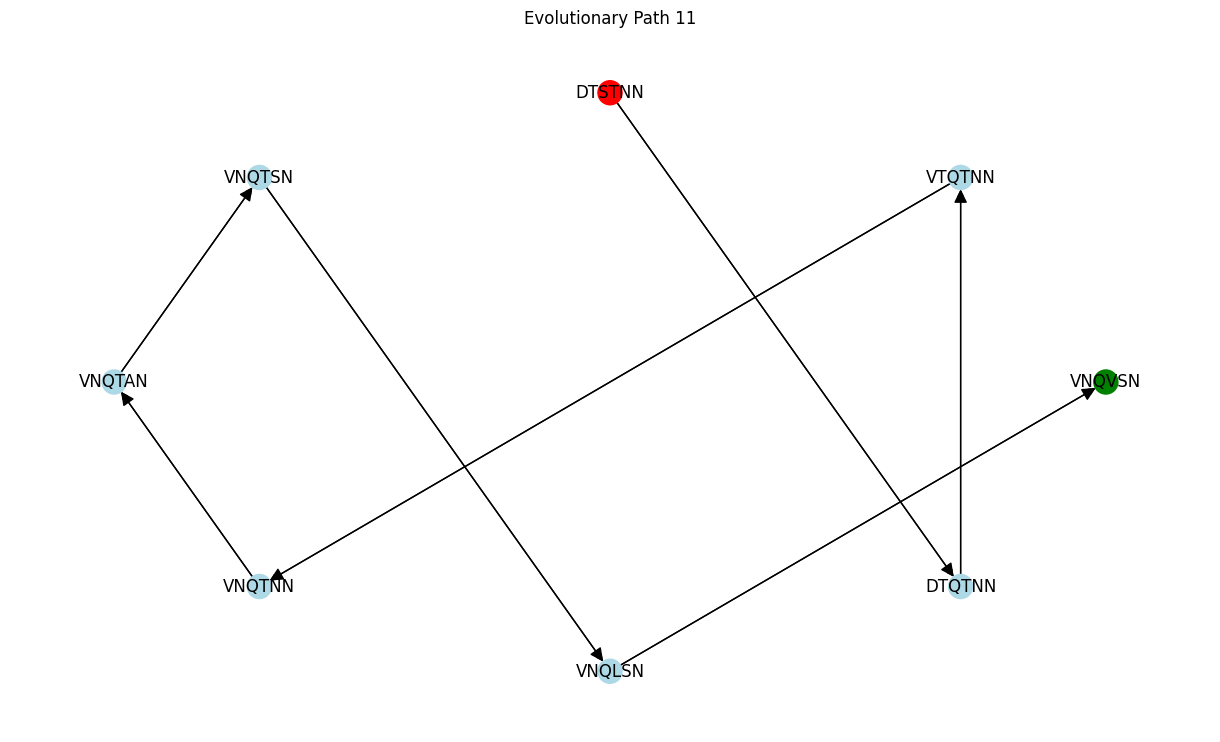

11 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'N142A', 'A142S', 'T141L', 'L141V']


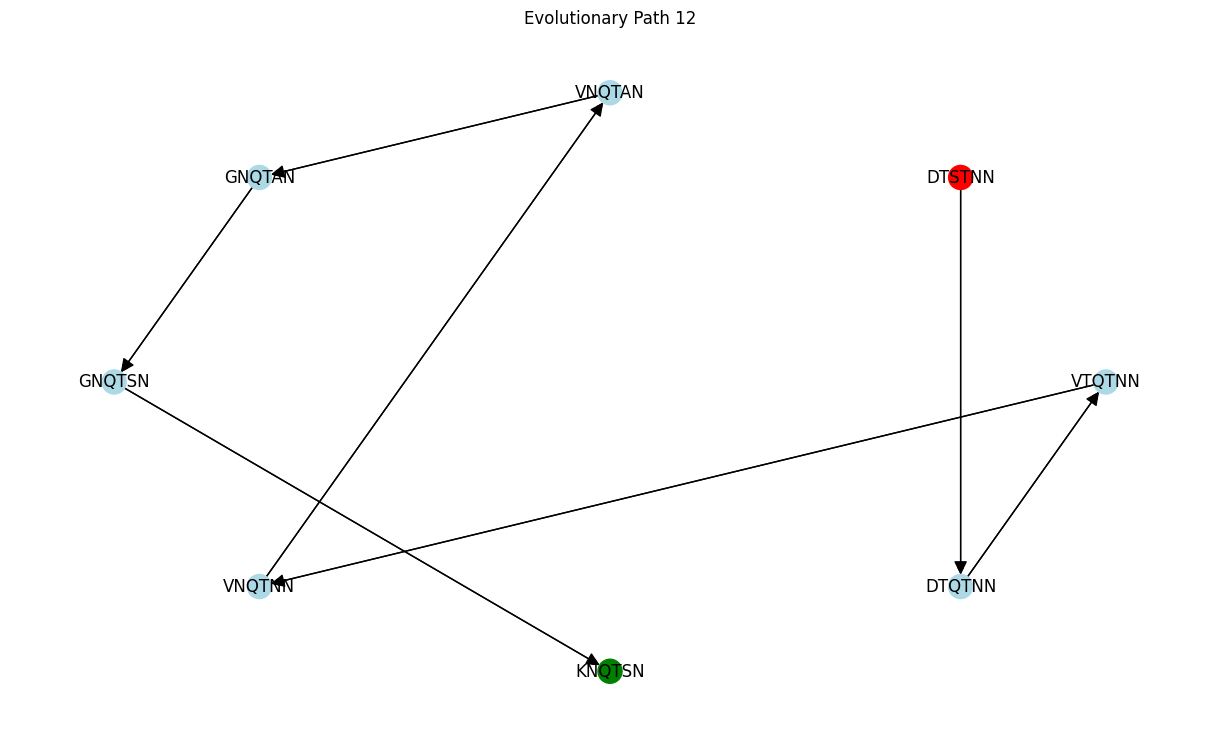

12 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'N142A', 'V138G', 'A142S', 'G138K']


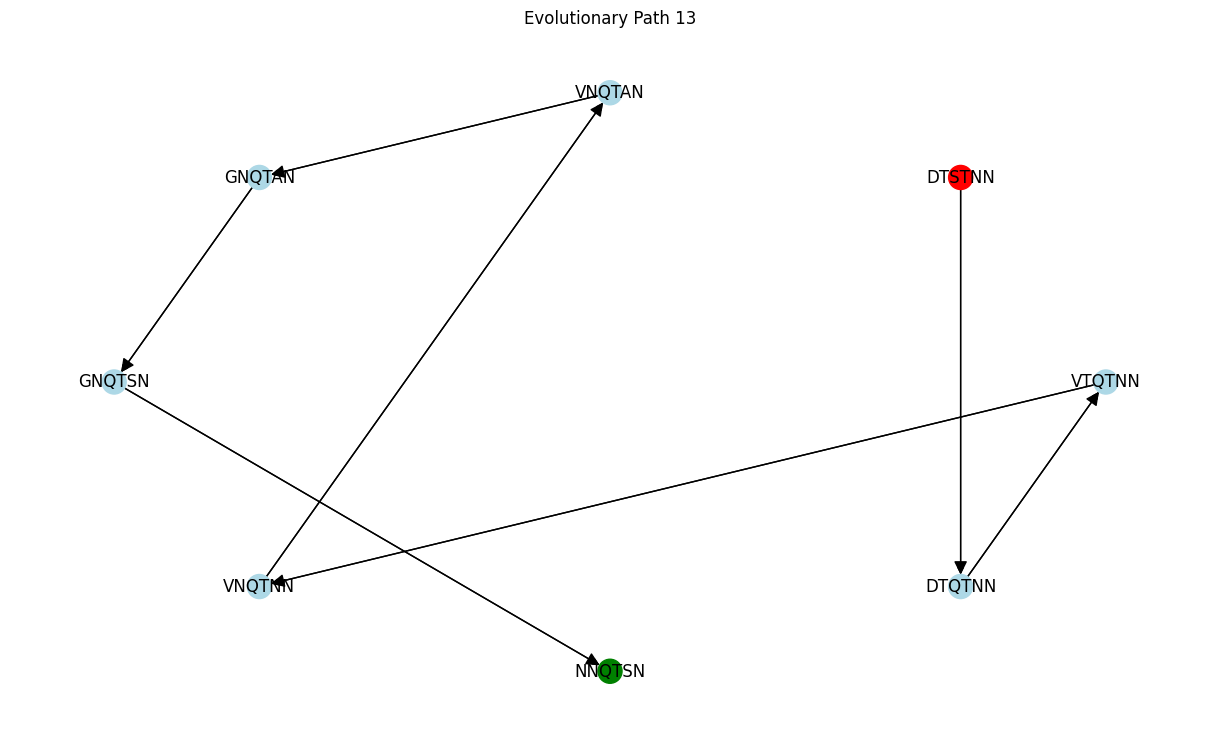

13 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'N142A', 'V138G', 'A142S', 'G138N']


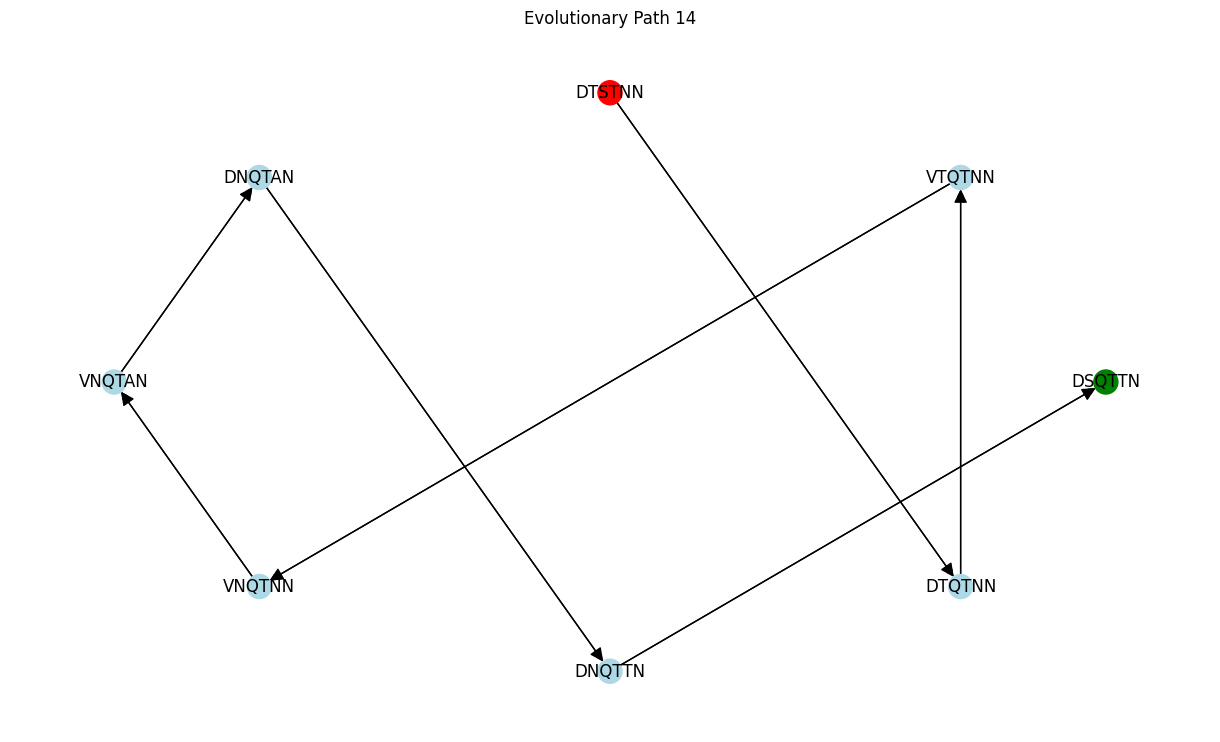

14 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'N142A', 'V138D', 'A142T', 'N139S']


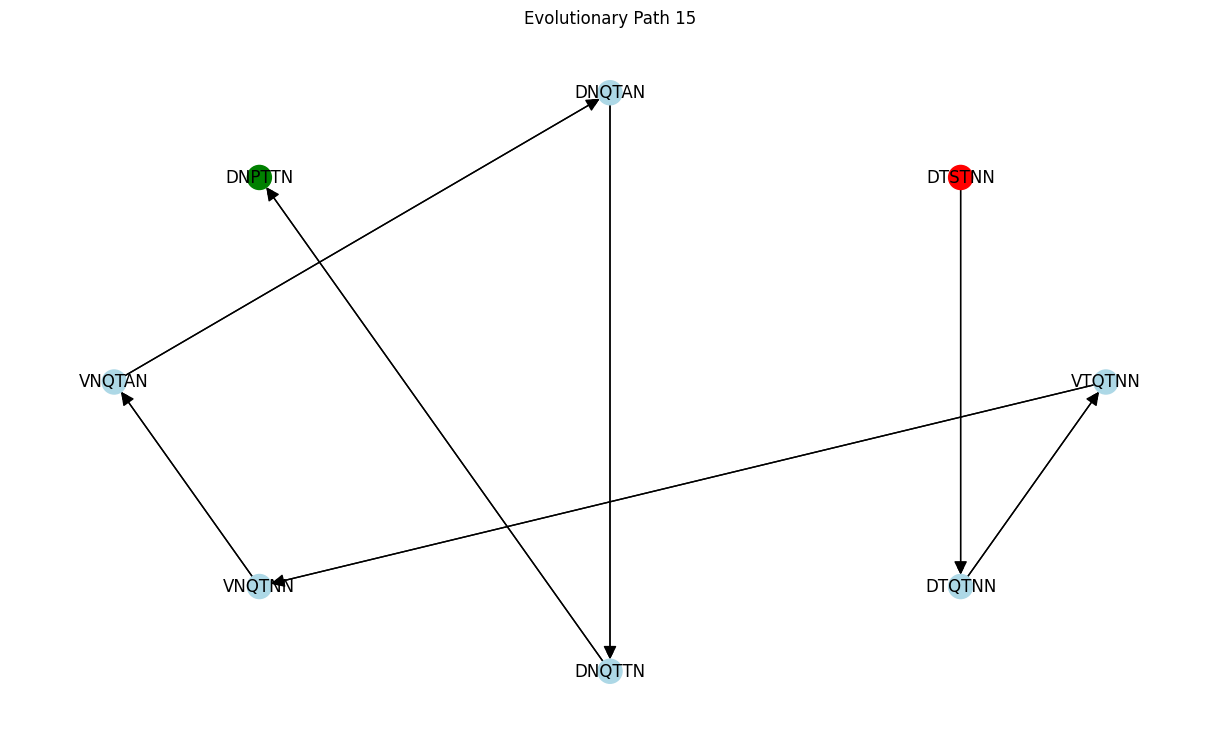

15 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'N142A', 'V138D', 'A142T', 'Q140P']


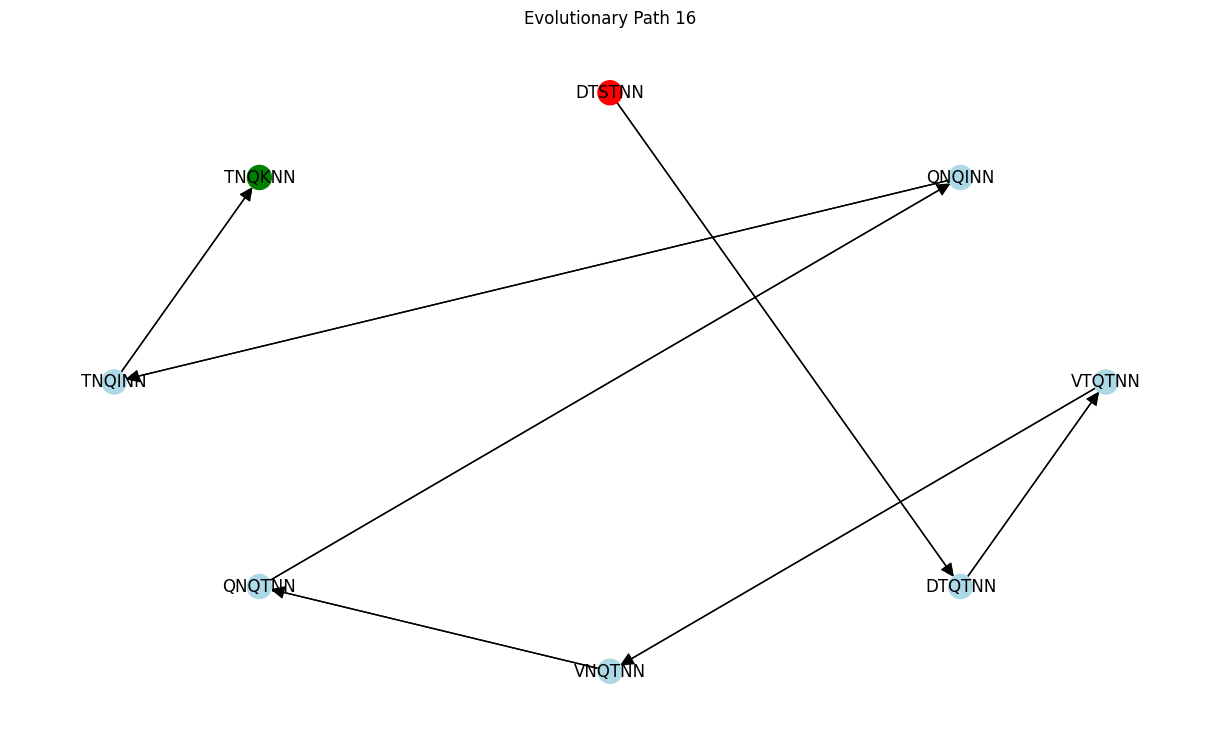

16 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'V138Q', 'T141I', 'Q138T', 'I141K']


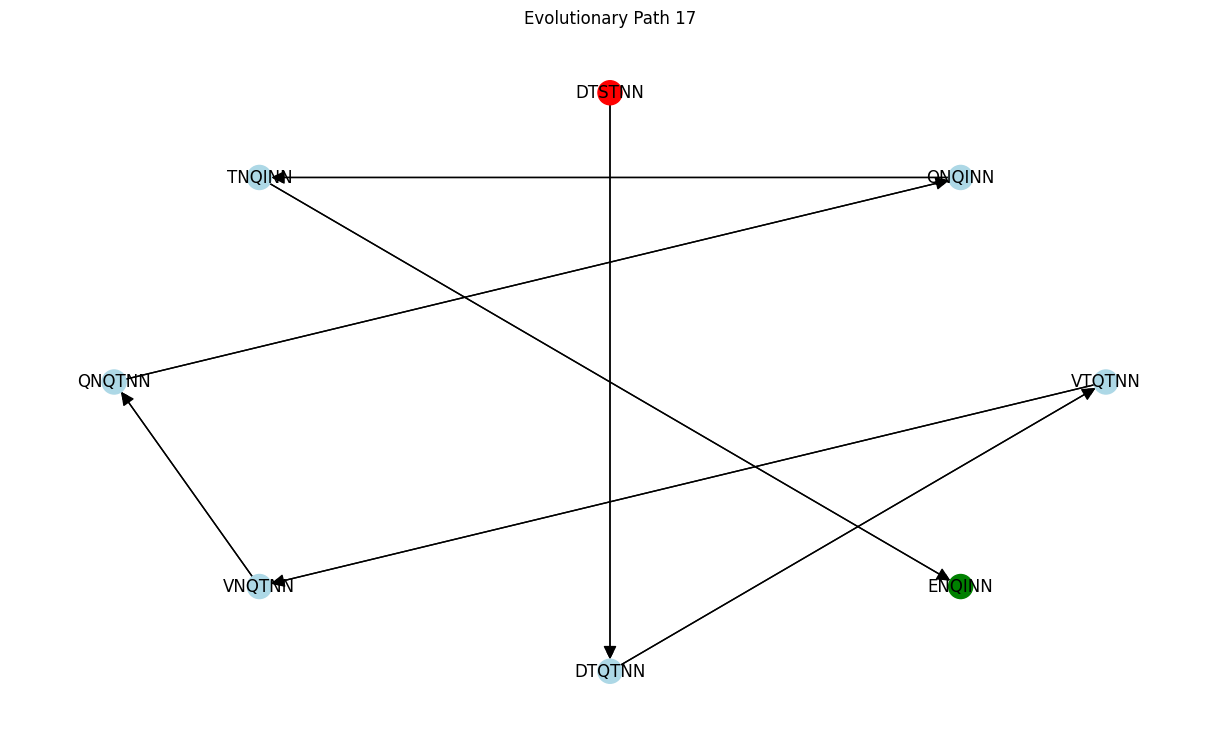

17 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'V138Q', 'T141I', 'Q138T', 'T138E']


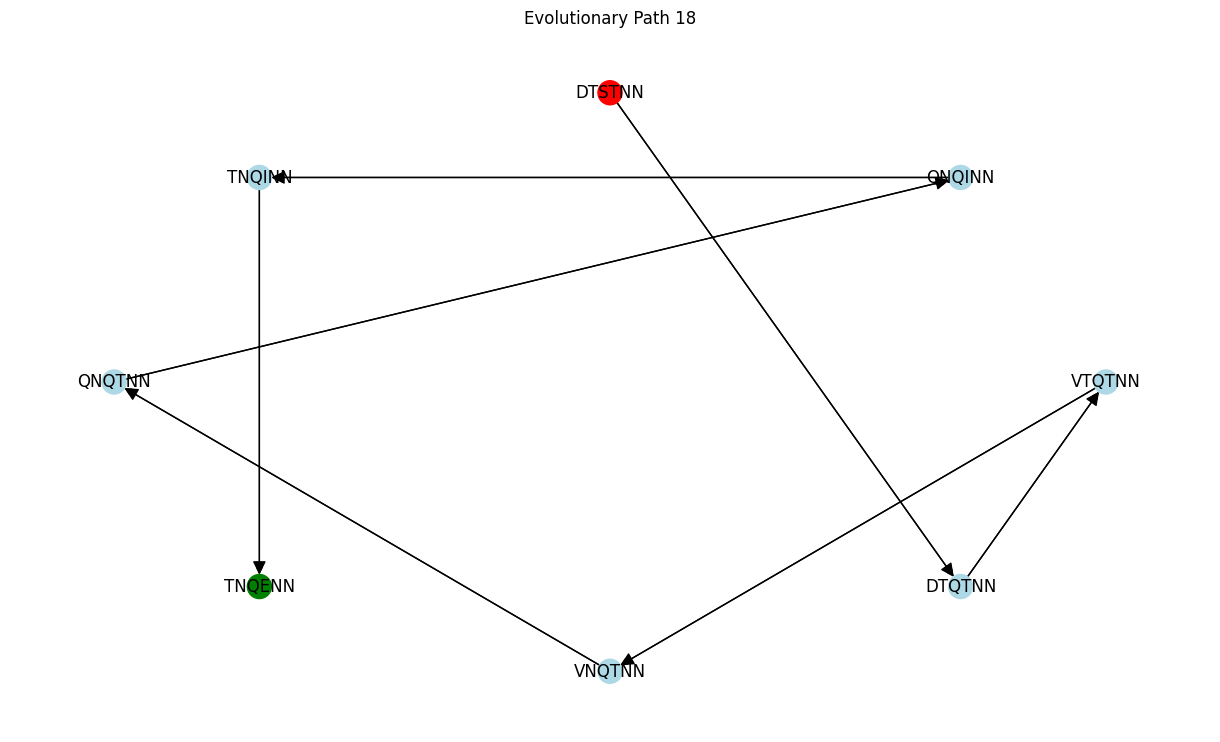

18 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'V138Q', 'T141I', 'Q138T', 'I141E']


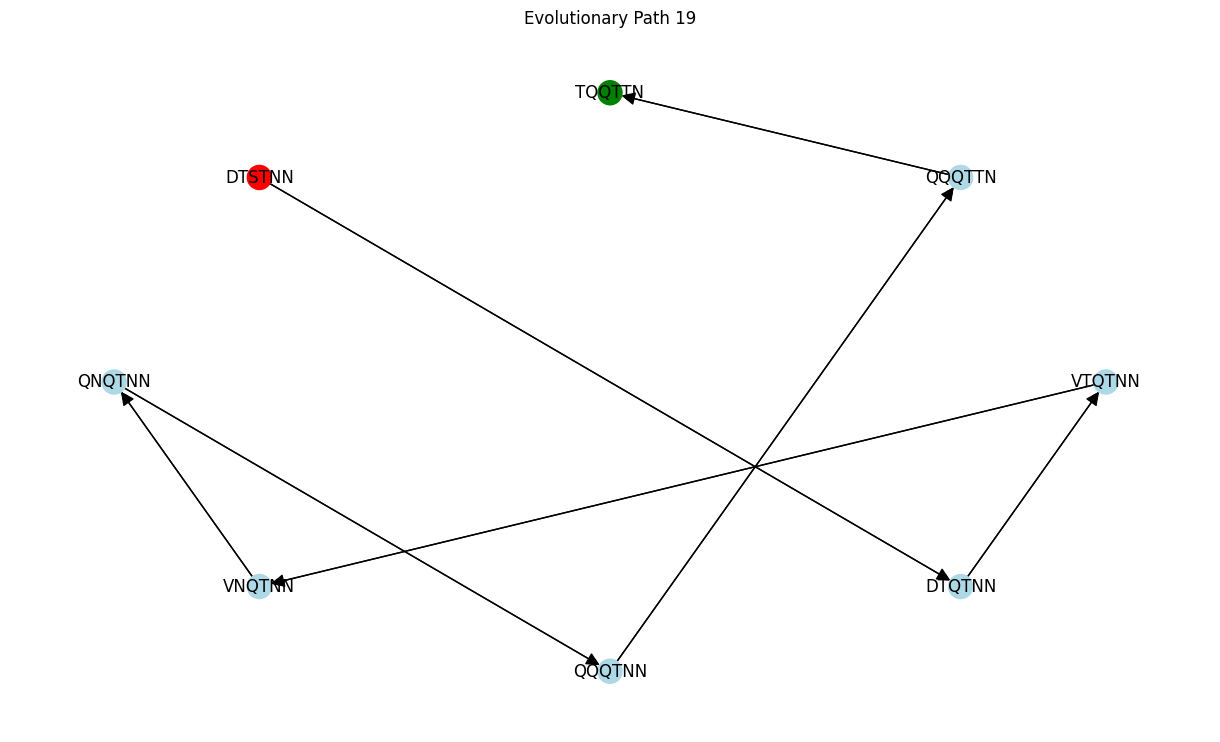

19 as mutations: [None, 'S140Q', 'D138V', 'T139N', 'V138Q', 'N139Q', 'N142T', 'Q138T']


In [15]:
for i in range(num_of_paths):
    average_mutation_score,path = paths[i]
    path_name = i+1 # start from Path 1
    evolution.visualise_graph(path=path,title=f"Evolutionary Path {path_name}")
    path_as_mutations = evaluator.get_path_as_mutations(path)
    print(f"{path_name} as mutations: {path_as_mutations}")

In [16]:
paths_mutation_matches,paths_final_segment_matches,paths_consecutive_pair_matches = evaluator.get_paths_metric_data(paths)

Paths: [['DTKTNN', 'DTVTNN'], ['DTKTNN', 'TTKTNN', 'TTETNN', 'TTETKN'], ['DTKTNN', 'TTKTNN', 'TTETNN', 'TCETNN', 'TCETRN', 'TEETRN'], ['DTKTNN', 'TTKTNN', 'TTETNN', 'TCETNN', 'TCETRN', 'TTETRN', 'TTETGN'], ['DTKTNN', 'TTKTNN', 'TTETNN', 'TCETNN', 'TCETSN', 'TAETSN', 'TAGTSN'], ['DTKTNN', 'TTKTNN', 'TTETNN', 'TCETNN', 'TCETSN', 'TDETSN', 'TTETSN'], ['DTKTNN', 'TTKTNN', 'TTETNN', 'TCETNN', 'TCETSN', 'TCEPSN', 'TQEPSN'], ['DTKTNN', 'DTKTTN', 'DTPTTN'], ['DTQTNN', 'DTQTTN', 'DTQVTN'], ['DTQTNN', 'VTQTNN', 'VNQTNN', 'VNQTAN', 'VNQTSN', 'ENQTSN', 'ENQISN'], ['DTQTNN', 'VTQTNN', 'VNQTNN', 'VNQTAN', 'VNQTSN', 'VNQLSN', 'VNQVSN'], ['DTQTNN', 'VTQTNN', 'VNQTNN', 'VNQTAN', 'GNQTAN', 'GNQTSN', 'KNQTSN'], ['DTQTNN', 'VTQTNN', 'VNQTNN', 'VNQTAN', 'GNQTAN', 'GNQTSN', 'NNQTSN'], ['DTQTNN', 'VTQTNN', 'VNQTNN', 'VNQTAN', 'DNQTAN', 'DNQTTN', 'DSQTTN'], ['DTQTNN', 'VTQTNN', 'VNQTNN', 'VNQTAN', 'DNQTAN', 'DNQTTN', 'DNPTTN'], ['DTQTNN', 'VTQTNN', 'VNQTNN', 'QNQTNN', 'QNQINN', 'TNQINN', 'TNQKNN'], ['DTQTNN',

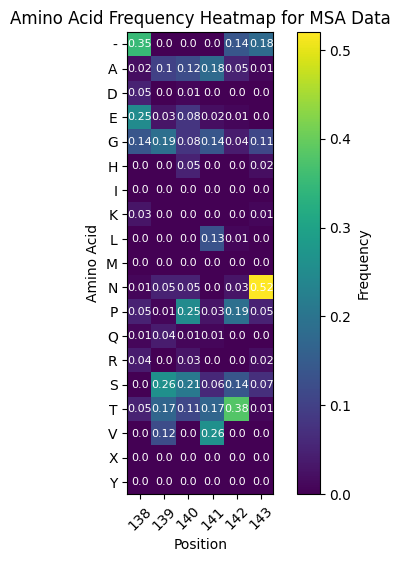

In [17]:
evaluator.heatmap_plot_aa_frequencies()

In [18]:
paths_mutation_matches_by_mutation = evaluator.get_metrics_by_mutation(paths_mutation_matches,paths)
for i in range(num_of_paths):
    path_name = f"Path {i+1}"
    print(f"{path_name}: {paths_mutation_matches_by_mutation[path_name]}")

Path 1: [('S140K', 0.0), ('K140V', 0.0)]
Path 2: [('S140K', 0.0), ('D138T', 0.05), ('K140E', 0.08), ('N142K', 0.0)]
Path 3: [('S140K', 0.0), ('D138T', 0.05), ('K140E', 0.08), ('T139C', 0.0), ('N142R', 0.0), ('C139E', 0.03)]
Path 4: [('S140K', 0.0), ('D138T', 0.05), ('K140E', 0.08), ('T139C', 0.0), ('N142R', 0.0), ('C139T', 0.17), ('R142G', 0.04)]
Path 5: [('S140K', 0.0), ('D138T', 0.05), ('K140E', 0.08), ('T139C', 0.0), ('N142S', 0.14), ('C139A', 0.1), ('E140G', 0.08)]
Path 6: [('S140K', 0.0), ('D138T', 0.05), ('K140E', 0.08), ('T139C', 0.0), ('N142S', 0.14), ('C139D', 0.0), ('D139T', 0.17)]
Path 7: [('S140K', 0.0), ('D138T', 0.05), ('K140E', 0.08), ('T139C', 0.0), ('N142S', 0.14), ('T141P', 0.03), ('C139Q', 0.04)]
Path 8: [('S140K', 0.0), ('N142T', 0.38), ('K140P', 0.25)]
Path 9: [('S140Q', 0.01), ('N142T', 0.38), ('T141V', 0.26)]
Path 10: [('S140Q', 0.01), ('D138V', 0.0), ('T139N', 0.05), ('N142A', 0.05), ('A142S', 0.14), ('V138E', 0.25), ('T141I', 0.0)]
Path 11: [('S140Q', 0.01), ('

In [19]:
def get_average_proportion_of_paths_with_values_0(paths_metrics):
    proportions = []
    for path_metrics in paths_metrics:
        path_len = len(path_metrics)
        if path_len==0:
            continue
        mutations_with_value_0 = 0
        for mf in path_metrics:
            if mf == 0.0:
                mutations_with_value_0 += 1
        proportion = round(mutations_with_value_0/path_len,2)
        proportions.append(proportion)

    average_proportion = round(sum(proportions)/len(proportions),2)
    return average_proportion

average_mf_0 = get_average_proportion_of_paths_with_values_0(paths_mutation_matches)
print(f"Average proportion of mutations with MF=0 per path: {average_mf_0}")

Average proportion of mutations with MF=0 per path: 0.31


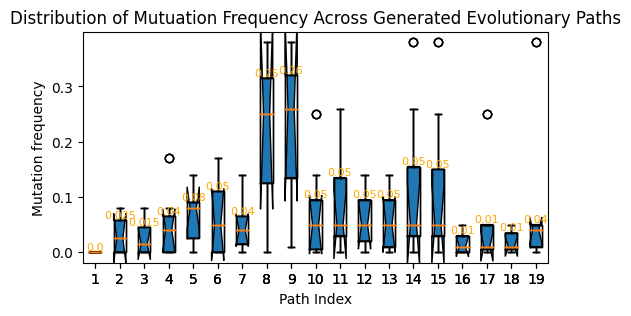

In [20]:
evaluator.box_plot_path_mutation_matches(paths_mutation_matches)

In [21]:
paths_pair_matches_by_mutation = evaluator.get_metrics_by_mutation(paths_consecutive_pair_matches,paths,pair=True)
for i in range(num_of_paths):
    path_name = f"Path {i+1}"
    print(f"{path_name}: {paths_pair_matches_by_mutation[path_name]}")

Path 1: [('S140K', 'K140V', 0.0)]
Path 2: [('S140K', 'D138T', 0.0), ('D138T', 'K140E', 0.0), ('K140E', 'N142K', 0.0)]
Path 3: [('S140K', 'D138T', 0.0), ('D138T', 'K140E', 0.0), ('K140E', 'T139C', 0.0), ('T139C', 'N142R', 0.0), ('N142R', 'C139E', 0.0)]
Path 4: [('S140K', 'D138T', 0.0), ('D138T', 'K140E', 0.0), ('K140E', 'T139C', 0.0), ('T139C', 'N142R', 0.0), ('N142R', 'C139T', 0.0), ('C139T', 'R142G', 0.03)]
Path 5: [('S140K', 'D138T', 0.0), ('D138T', 'K140E', 0.0), ('K140E', 'T139C', 0.0), ('T139C', 'N142S', 0.0), ('N142S', 'C139A', 0.02), ('C139A', 'E140G', 0.0)]
Path 6: [('S140K', 'D138T', 0.0), ('D138T', 'K140E', 0.0), ('K140E', 'T139C', 0.0), ('T139C', 'N142S', 0.0), ('N142S', 'C139D', 0.0), ('C139D', 'D139T', 0.0)]
Path 7: [('S140K', 'D138T', 0.0), ('D138T', 'K140E', 0.0), ('K140E', 'T139C', 0.0), ('T139C', 'N142S', 0.0), ('N142S', 'T141P', 0.01), ('T141P', 'C139Q', 0.0)]
Path 8: [('S140K', 'N142T', 0.0), ('N142T', 'K140P', 0.15)]
Path 9: [('S140Q', 'N142T', 0.0), ('N142T', 'T141

In [22]:
average_cmc_0 = get_average_proportion_of_paths_with_values_0(paths_consecutive_pair_matches)
print(f"Average proportion of mutations with CMC=0 per path: {average_cmc_0}")

Average proportion of mutations with CMC=0 per path: 0.85


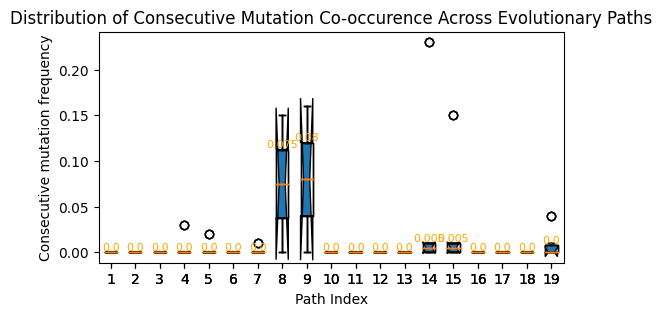

In [23]:
evaluator.box_plot_path_consecutive_pair_matches(paths_consecutive_pair_matches)

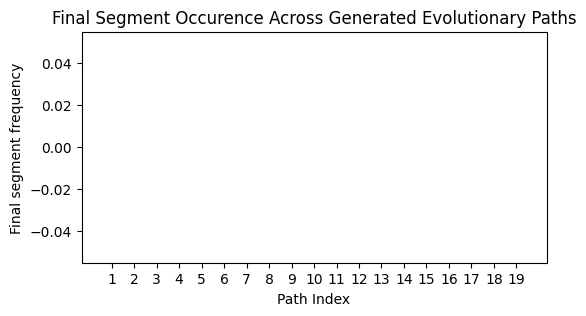

In [24]:
evaluator.bar_plot_path_final_segment_matches(paths_final_segment_matches)

In [25]:
# prior to changing should_continue_mutating from checking if sequence probability is increasing to checking if overall mutatioon score is increasing and using the minimum average logit score per position rather than the minimum aa logit value
# experiment observation: constraining positions for mutation increases length of evolution path  
# this is not surprising as mutating the position least favoured by the PLM != mutating the position that will yield an increase in sequence probability 
# replacing the current amino acid at the lowest logit position does not automatically increase the sequence probability 
# this is because it may choose a position where mutations are unlikely to happen at to begin  with (ie highly conserved regions) 
# thus leading to an overall decrease on the sequence probability and structure similarity
# When mutations are contrained to positions we know are highly variable from observed data, this aligns with the PLM's knowledge of existing mutations
# such that mutating these highly variable position can lead to higher probability sequences as it expects mutations to occur in these positions